In [ ]:
#import libraries
import torch
from torch.utils import data
from torchvision import datasets,transforms
import numpy as np
from torch import nn
import torch.nn.functional as f
from PIL import Image
import matplotlib.pyplot as plt
from torch import optim
from sklearn.metrics import accuracy_score, roc_auc_score
import os
import pickle

In [ ]:
device='cuda'

# MNIST model

## getting data

In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz

--2021-03-15 06:14:55--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-15 06:14:55--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [             <=>    ]  33.20M  11.1MB/s    in 3.0s    

2021-03-15 06:14:59 (11.1 MB/s) - ‘MNIST.tar.gz’ saved [34813078]



In [ ]:
!tar -zxvf MNIST.tar.gz

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/processed/
MNIST/processed/training.pt
MNIST/processed/test.pt


In [ ]:
root_dir = './'
datasets.MNIST(root=root_dir,download=True)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [ ]:
train_set = datasets.MNIST(root=root_dir, train=True, download=False, transform=transforms.ToTensor())
test_set = datasets.MNIST(root=root_dir, train=False, download=False, transform=transforms.ToTensor())

In [ ]:
train_loader = data.DataLoader(train_set,batch_size=64,shuffle=True)
test_loader = data.DataLoader(test_set,batch_size=64,shuffle=True)

In [ ]:
data_iter=iter(trainloader)
images, labels = data_iter.next()

print(type(images))
print(images.shape)
print(labels.shape)

plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

ValueError: ignored

## 3 ways defining Model

In [ ]:
class net(nn.Module): #why do we use this? inheritance
  def __init__(self):
    super().__init__() #why do we use this?
    #inherits all th properties of nn.module, whoch provides lots of methods for easy use
    self.hidden1=nn.Linear(784,128) #creates xW+b for 784 i/p and 128 o/p
    self.hidden2=nn.Linear(128,64)
    self.output=nn.Linear(64,10)
  
  def forward():
    x=F.relu(self.hidden1(x))
    x=F.relu(self.hidden2(x))
    x=F.softmax(self.output(x),dim=1) #rows-> batch columns->softmax

In [ ]:
from collections import OrderedDict
input_size=784
hidden_size=[128,64]
output_size=10

model=nn.Sequential(OrderedDict([
                     ('fc1',nn.Linear(input_size,hidden_size[0])),
                     ('relu1',nn.ReLU()),
                     ('fc2',nn.Linear(hidden_size[0],hidden_size[1])),
                    ('relu2',nn.ReLU()),
                      ('fc3',nn.Linear(hidden_size[1],output_size)),
                      ('softmax',nn.Softmax(dim=1))]))

In [ ]:
input_size=784
hidden_size=[128,64]
output_size=10

model=nn.Sequential(
                     nn.Linear(input_size,hidden_size[0]),
                     nn.ReLU(),
                    nn.Linear(hidden_size[0],hidden_size[1]),
                    nn.ReLU(),
                      nn.Linear(hidden_size[1],output_size),
                     nn.Softmax(dim=1))

In [ ]:
model=net()
print(model)

net(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
#view the weights of first layer
print(model.hidden1.weight)
print(model.hidden1.weight.shape)

Parameter containing:
tensor([[ 7.7773e-03,  2.6213e-02, -7.5765e-03,  ...,  1.9262e-02,
          4.0357e-05,  1.9669e-02],
        [ 2.3654e-02,  6.8337e-03,  2.7390e-02,  ..., -2.4977e-02,
         -1.8353e-02,  3.9916e-03],
        [-3.5160e-03, -3.0593e-02,  1.4294e-02,  ...,  2.6567e-02,
         -2.2277e-02, -2.3799e-02],
        ...,
        [-3.1853e-02,  1.7903e-02,  2.4519e-02,  ...,  2.1167e-02,
          1.8438e-02,  2.3090e-03],
        [-3.3297e-02, -2.5045e-02,  2.2926e-02,  ..., -8.1689e-03,
          2.9683e-02,  2.8208e-02],
        [ 2.6598e-02,  1.9062e-02,  2.5593e-02,  ...,  1.6217e-02,
         -1.6130e-03, -7.2461e-03]], requires_grad=True)
torch.Size([128, 784])


## Data transformation

In [ ]:
data_iter=iter(train_loader)
images, labels = data_iter.next()
 
images.resize(64,1,784) #(batch_size,channels, image pixels)

/usr/local/lib/python3.7/dist-packages/torch/tensor.py:474: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model.parameters(), lr=0.01)
epochs=2


for e in range(epochs):
  for images,labels in train_loader:

    images=images.view(images.shape[0],-1) #reshaping to (64,784)
    
    optimizer.zero_grad() #clearing up the gradients of previous iteration

    logits=model.forward(images)

    loss=criterion(logits,labels)
    loss.backward()
    print(loss) #will print (train_size/batch_size)*epochs times
    optimizer.step()

Crossentrop Loss calculates softmax on its own, and thus it can be ignored while declaring the model

gradients are accessed using .grade() function

## testing

In [ ]:
accuracy=0
optimizer.zero_grad()
for images,labels in test_loader:
  images=images.view(images.shape[0],-1) #reshaping to (64,784)
  probs=model(images)
  #loss=criterion(probs,labels)
  #print(loss)

  top_p, top_class = probs.topk(1,dim=1)
  equals = top_class == labels.view(*top_class.shape)
  accuracy+= torch.mean(equals.type(torch.FloatTensor))


In [ ]:
#printing accuracy
(accuracy/len(test_loader)*100).item()

26.66202163696289

In [ ]:
checkpoint={
    'input_size':784,
'hidden_size':[128,64],
'output_size':10,
'state_dict': model.state_dict()
}
torch.save(checkpoint, 'checkpoint.pth')

In [ ]:
#loading the  model


model=nn.Sequential(OrderedDict([
                     ('fc1',nn.Linear(input_size,hidden_size[0])),
                     ('relu1',nn.ReLU()),
                     ('fc2',nn.Linear(hidden_size[0],hidden_size[1])),
                    ('relu2',nn.ReLU()),
                      ('fc3',nn.Linear(hidden_size[1],output_size)),
                      ('softmax',nn.Softmax(dim=1))]))

checkpoint=torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['state_dict'])

# CNN Model

## Getting data ready

In [ ]:
!wget -c https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2021-03-17 04:16:57--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  76.5MB/s    in 2.1s    

2021-03-17 04:17:00 (76.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [ ]:
!tar -zxvf /content/cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
import _pickle as cPickle
def load_batch(file1):
    path = 'cifar-10-batches-py/'
    #file = 'data_batch_1'

    f = open(path+file1, 'rb')
    dict = cPickle.load(f,encoding='latin1')
    images = dict['data']
    images = np.reshape(images, (10000, 3, 32, 32))
    labels = dict['labels']
    imagearray = np.array(images)   #   (10000, 3072)
    labelarray = np.array(labels)   #   (10000,)
    
    return imagearray, labelarray

In [ ]:
def split_and_add(new_arr):
  im2=[]
  for i in range(new_arr.shape[0]):
    im=np.array(new_arr[i])
    im2.append(im)
  return im2

def split_and_add_lab(new_arr):
  im2=[]
  for i in range(new_arr.shape[0]):
    im=np.array(new_arr[i])
    im2.append(im)
  return im2

In [ ]:
#test=np.random.rand(10000, 3, 32, 32)

In [ ]:
all_files=os.listdir('/content/cifar-10-batches-py')
img_arr=[]
lab_arr=[]
test_img_arr=[]
test_lab_arr=[]
for i in all_files:
  if i[0]=='d':
    im,l=load_batch(i)
    img_arr.extend(split_and_add(im))
    lab_arr.extend(l)
  elif i[0]=='t':
    im,l=load_batch(i)
    test_img_arr.extend(split_and_add(im))
    test_lab_arr.extend(l)

In [ ]:
len(lab_arr)

50000

In [ ]:
lab_arr[0]

0

In [ ]:
#the data is in format
'''
  [10000,3,32,32] x5
  making it to -> [50000,3,32,32]
'''

'\n  [10000,3,32,32] x5\n  making it to -> [50000,3,32,32]\n'

In [ ]:
class Cdataset(data.Dataset):
  def __init__(self, img_arr,lab_arr ):
    self.x_data = torch.tensor(img_arr,
      dtype=torch.float32).to(device)
    self.y_data = torch.tensor(lab_arr,
      dtype=torch.long).to(device)

  def __len__(self):
    return len(self.x_data)  # required

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()
    preds = self.x_data[idx]
    pol = self.y_data[idx]
    #sample = { 'image' : preds, 'label' : pol }
    return preds,pol

In [ ]:
train_data=Cdataset(img_arr,lab_arr)
test_data=Cdataset(test_img_arr,test_lab_arr)

In [ ]:
train_loader=data.DataLoader(train_data,batch_size=32,shuffle=True)
test_loader=data.DataLoader(test_data,batch_size=32,shuffle=True)

In [ ]:
data_iter=iter(train_loader)
images, labels = data_iter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([32, 3, 32, 32])
torch.Size([32])


## Defining model

In [ ]:
class net(nn.Module):
  def __init__(self):
    super().__init__()
    # torch.Size([32, 3, 32, 32])
    self.conv1=nn.Conv2d(3,16,3) 
    # torch.Size([32, 16, 30, 30])
    self.conv2=nn.Conv2d(16,32,3)
    # torch.Size([32, 32, 28, 28])
    self.maxpool1=nn.MaxPool2d(2)
    # torch.Size([32, 32, 14, 14])
    self.conv3=nn.Conv2d(32, 64, 3)
    # torch.Size([32, 64, 12, 12])
    self.conv4=nn.Conv2d(64, 128, 3)
    # torch.Size([32, 128, 10, 10])
    self.maxpool2=nn.MaxPool2d(2)
    # torch.Size([32, 128, 5, 5])
    self.flatten=nn.Flatten()
    # torch.Size([32, 3200])
    self.fc1=nn.Linear(3200 ,1204)
    self.fc2=nn.Linear(1204,256)
    self.fc3=nn.Linear(256,64)
    self.fc4=nn.Linear(64,10) #10 classes

  def forward(self,x):
    x=f.relu(self.conv1(x))
    x=f.relu(self.conv2(x))
    x=self.maxpool1(x)
    x=f.relu(self.conv3(x))
    x=f.relu(self.conv4(x))
    x=self.maxpool2(x)
    x=self.flatten(x)
    x=f.relu(self.fc1(x))
    x=f.relu(self.fc2(x))
    x=f.relu(self.fc3(x))
    x=f.softmax(self.fc4(x),dim=1)
    return x
    
model=net()

In [ ]:
print(model)

net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3200, out_features=1204, bias=True)
  (fc2): Linear(in_features=1204, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


## Training

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(params=model.parameters(),lr=0.03)
epochs=1

In [ ]:
for e in range(epochs):
  for images,labels in train_loader:
    optimizer.zero_grad()
    logits=model(images)
    loss=criterion(logits,labels)
    loss.backward() #get the gradients
    optimizer.step()# update the wieghts
    break

In [ ]:
checkpoint={
    'input_size':[3,32,32],
    'output_size':10,
    'state_dict': model.state_dict()
}
torch.save(checkpoint, 'checkpoint.pth')

In [ ]:
dict1=pickle.load('/content/checkpoint.pth')
model.load_state_dict(dict1['state_dict'])

In [ ]:
def calculate_acc_auc(actual, prediction):
  prediction=torch.argmax(prediction,dim=1)
  return accuracy_score(actual.tolist().copy(), prediction.tolist().copy())#, roc_auc_score(actual.tolist().copy(), prediction_prob.tolist().copy())

In [ ]:
acc_1=[]
for images,labels in test_loader:
  optimizer.zero_grad()
  logits=model(images)
  acc = calculate_acc_auc(labels, logits)
  acc_1.append(acc)
  #print(acc)

print("avg acc", sum(acc_1)/len(acc_1))

# Transfer learning

In [ ]:
from torchvision import models
model=models.vgg16(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [ ]:
#print(model.features) #view convolution layer
print(model.classifier) #view classification layer

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [ ]:
#freese training for all cnn layers
for param in model.features.parameters():
  param.requires_grad=False

In [ ]:
#vgg16 is used for image net->1000 classes,
#we make it train for cifar 10 -> 10 classes

In [ ]:
n_classes=10
in_features=model.classifier[6].in_features

last_layer = nn.Linear(in_features, n_classes)
model.classifier[6]=last_layer
print(model.classifier[6])

Linear(in_features=4096, out_features=10, bias=True)


In [ ]:
a=torch.randn(2,1,3,1).squeeze()
print(a)

tensor([[-0.4889,  0.2477, -0.1475],
        [ 0.3084,  0.6662, -1.2789]])


# RNN (text generation)

In [ ]:
!wget https://www.gutenberg.org/cache/epub/11/pg11.txt

--2021-03-18 04:06:18--  https://www.gutenberg.org/cache/epub/11/pg11.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 406 Not Acceptable
2021-03-18 04:06:19 ERROR 406: Not Acceptable.



In [ ]:
!cp "/content/drive/MyDrive/Neural Networks Practice/wonderland.txt" "/content"

In [ ]:
txt_file="/content/wonderland.txt"
text=open(txt_file, 'r', encoding='utf-8').read()

In [ ]:
type(text)

str

In [ ]:
text=text.lower()

In [ ]:
#remove punnctuations
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
word_list=tokenizer.tokenize(text)

In [ ]:
text=' '.join(word_list)

In [ ]:
#making a mapping
chars=sorted(list(set(text)))
maps=dict((c,i) for i,c in enumerate(chars))

In [ ]:
n_chars = len(text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  135061
Total Vocab:  30


In [ ]:
seq_len=10
x_list=[]
y_list=[]
for i in range(n_chars-seq_len):
  x_list.append(text[i:seq_len+i])
  y_list.append(text[seq_len+i])

assert len(x_list)==len(y_list)

In [ ]:
"""
Since strings cannot be converted to tensors, we convert each character 
to an integer tensor.
"""

'\nSince strings cannot be converted to tensors, we convert each character \nto an integer tensor.\n'

In [ ]:
x_list_int=[ [maps[i] for i in x_list[j]] for j in range(len(x_list)) ]
y_list_int=[ maps[y_list[j]] for j in range(len(y_list)) ]

In [ ]:
class Tdataset(data.Dataset):
  def __init__(self, x_list_int,y_list_int ):
    self.x_data = torch.tensor(x_list_int,
      dtype=torch.int32).to(device)
    self.y_data = torch.tensor(y_list_int,
      dtype=torch.int32).to(device)

  def __len__(self):
    return len(self.x_data)  # required

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()
    preds = self.x_data[idx]
    return preds

In [ ]:
train_data=Tdataset(x_list_int,y_list_int)

In [ ]:
len(train_data)

135051

In [ ]:
batch_size=32

In [ ]:
train_loader=data.DataLoader(train_data,batch_size)

In [ ]:
class net(nn.Module):
  def __init__(self):
    super().__init__()
    ##################### input features, 
    self.lstm1 = nn.LSTM(input_size = 10, hidden_size = seq_len, num_layers =2) 
    self.dropout = nn.Dropout(0.2)
    self.linear1 = nn.Linear(256,n_vocab)
  def forward(self,x):
    x=self.lstm1(x)
    #print("after lstm ", x.shape)
    x=self.dropout(x)
    #print("after lstm ", x.shape)

    x=self.softmax(self.linear1(x),dim=1)
    print("after softmax ", x.shape)


In [ ]:
model= net()
print(model)

net(
  (lstm1): LSTM(10, 10, num_layers=2)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear1): Linear(in_features=256, out_features=30, bias=True)
)


In [ ]:
a=torch.rand([32,1,10])
print(type(a))
model(a)

<class 'torch.Tensor'>


TypeError: ignored

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(params=model.parameters(),lr=0.03)
epochs=1

In [ ]:
for e in range(epochs):
  for x,y in train_loader:
    optimizer.zero_grad()
    print(x.shape)
    logits=model(x)
    loss=criterion(logits,y)
    loss.backward()
    optimizer.step()

# GAN

In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz

--2021-03-25 07:25:51--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-25 07:25:51--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [      <=>           ]  33.20M  29.2MB/s    in 1.1s    

2021-03-25 07:25:53 (29.2 MB/s) - ‘MNIST.tar.gz’ saved [34813078]



In [ ]:
!tar -zxvf MNIST.tar.gz

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/processed/
MNIST/processed/training.pt
MNIST/processed/test.pt


In [ ]:
root_dir = './'
datasets.MNIST(root=root_dir,download=True)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [ ]:
train_set = datasets.MNIST(root=root_dir, train=True, download=False, transform=transforms.ToTensor())
test_set = datasets.MNIST(root=root_dir, train=False, download=False, transform=transforms.ToTensor())

In [ ]:
train_loader = data.DataLoader(train_set,batch_size=64,shuffle=True)
test_loader = data.DataLoader(test_set,batch_size=64,shuffle=True)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


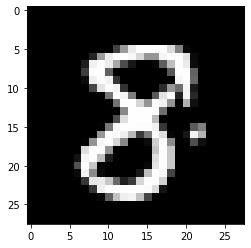

In [ ]:
data_iter=iter(train_loader)
images, labels = data_iter.next()

print(type(images))
print(images.shape)
print(labels.shape)

plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

In [ ]:
class Descriminator(nn.Module):
  def __init__(self,inp):
    super().__init__()
    self.fc1=nn.Linear(inp,1024)
    self.fc2=nn.Linear(self.fc1.out_features,self.fc1.out_features*2)
    self.fc3=nn.Linear(self.fc2.out_features,self.fc2.out_features*2)
    self.fc4=nn.Linear(self.fc3.out_features,1)

  def forward(self,x):
    x=f.leaky_relu(self.fc1(x),0.2)
    x=f.dropout(x,0.3)
    x=f.leaky_relu(self.fc2(x),0.2)
    x=f.dropout(x,0.3)
    x=f.leaky_relu(self.fc3(x),0.2)
    x=f.dropout(x,0.3)
    return torch.sigmoid(self.fc4(x))

class Generator(nn.Module):
  def __init__(self,inp,out):
    super().__init__()
    self.fc1=nn.Linear(inp,256)
    self.fc2=nn.Linear(self.fc1.out_features,self.fc1.out_features*2)
    self.fc3=nn.Linear(self.fc2.out_features,self.fc2.out_features*2)
    self.fc4=nn.Linear(self.fc3.out_features,out)

  def forward(self,x):
    x=f.leaky_relu(self.fc1(x),0.2)
    x=f.leaky_relu(self.fc2(x),0.2)
    x=f.leaky_relu(self.fc3(x),0.2)
    return torch.tanh(self.fc4(x))

In [ ]:
D=Descriminator(28*28).to(device)
G=Generator(100,28*28).to(device)
print(D)
print(G)

Descriminator(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2048, bias=True)
  (fc3): Linear(in_features=2048, out_features=4096, bias=True)
  (fc4): Linear(in_features=4096, out_features=1, bias=True)
)
Generator(
  (fc1): Linear(in_features=100, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=784, bias=True)
)


In [ ]:
data_iter=iter(train_loader)
images, labels = data_iter.next()

images.resize(64,1,784) #(batch_size,channels, image pixels)

/usr/local/lib/python3.7/dist-packages/torch/tensor.py:474: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
# loss
criterion = nn.BCELoss() 

# optimizer
lr = 0.0002 
G_optimizer = optim.Adam(G.parameters(), lr = lr)
D_optimizer = optim.Adam(D.parameters(), lr = lr)
epochs=1

In [ ]:
def D_train(real_images,real_labels):
  real_images=real_images.view(real_images.shape[0],-1).to(device) #reshaping to (64,784)
  D_optimizer.zero_grad() #clearing up the gradients of previous iteration
  real_logits=D.forward(real_images).squeeze().to(device)
  real_labels = real_labels.to(torch.float32).to(device)
  real_loss=criterion(real_logits,real_labels).to(device)
  rand_tensor=torch.randn((64,100)).to(device) # batch_size, i/p dim of G
  
  fake_images=G.forward(rand_tensor).to(device) # generating images using Generator
  fake_label=torch.full((64,1),fill_value=10).type(torch.float32).squeeze().to(device)
  fake_logits=D.forward(fake_images).squeeze().to(device)
  fake_loss=criterion(fake_logits,fake_label)
  D_loss=real_loss+fake_loss
  D_loss.backward()
  D_optimizer.step()
  return  D_loss.data.item()

In [ ]:
def G_train():
  G.zero_grad()
  rand_tensor=torch.randn(64,100).to(device) # batch_size, i/p dim of G
  fake_label=torch.full((64,1),fill_value=10).type(torch.float32).squeeze().to(device)

  image=G.forward(rand_tensor).to(device)
  logit=D.forward(image).squeeze().to(device)
  G_loss=criterion(logit,fake_label)

  # gradient backprop & optimize ONLY G's parameters
  G_loss.backward()
  G_optimizer.step()
      
  return G_loss.data.item()

In [ ]:
n_epoch = 10
for epoch in range(1, n_epoch+1):           
    D_losses, G_losses = [], []
    for batch_idx, (image,labels) in enumerate(train_loader):
        D_losses.append(D_train(image.to(device),labels.to(device)))
        G_losses.append(G_train())

    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch), n_epoch, torch.mean(torch.FloatTensor(D_losses)), torch.mean(torch.FloatTensor(G_losses))))

[1/10]: loss_d: 1.480, loss_g: 0.696
[2/10]: loss_d: 1.480, loss_g: 0.696
[3/10]: loss_d: 1.479, loss_g: 0.696
[4/10]: loss_d: 1.480, loss_g: 0.696
[5/10]: loss_d: 1.480, loss_g: 0.696
[6/10]: loss_d: 1.479, loss_g: 0.696
[7/10]: loss_d: 1.480, loss_g: 0.696
[8/10]: loss_d: 1.480, loss_g: 0.696
[9/10]: loss_d: 1.480, loss_g: 0.696
[10/10]: loss_d: 1.480, loss_g: 0.696


In [ ]:
checkpoint={
    'input_size':[28,28],
    'output_size':1,
    'state_dict': D.state_dict()
}
torch.save(checkpoint, 'Descriminator_checkpoint.pth')

checkpoint={
    'input_size':[100,28*28],
    'output_size':1,
    'state_dict': G.state_dict()
}
torch.save(checkpoint, 'Generator_checkpoint.pth')